<a href="https://colab.research.google.com/github/AbhijitMahajan14/Dataflow-Beam/blob/main/Branching_Pipelines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!{'pip install apache_beam'}

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 55.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.0/152.0 kB 20.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 102.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 669.1/669.1 kB 59.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.0/252.0 kB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 107.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 66.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (s

In [2]:
from google.colab import files
f= files.upload()

Saving dept_data.txt to dept_data.txt


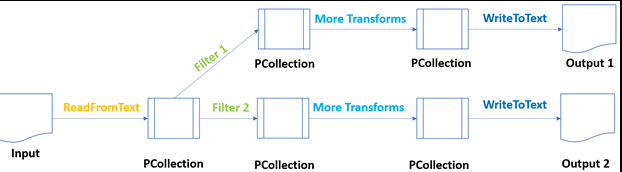

In [11]:
import apache_beam as beam
p1= beam.Pipeline()

input=(
    p1
    |beam.io.ReadFromText('dept_data.txt')
    |beam.Map(lambda row:row.split(','))
)

account=(
    input
    |beam.Filter(lambda row:row[3]=='Accounts')
    |beam.Map(lambda row:('Accounts '+row[1],1))
    |beam.CombinePerKey(sum)
    |beam.io.WriteToText('branching_account.txt')
)

hr=(
    input
    |'filter'>>beam.Filter(lambda row:row[3]=='HR')
    |'create tuple'>>beam.Map(lambda row:('HR '+row[1],1))
    |'combine'>>beam.CombinePerKey(sum)
    |'Write To Text'>>beam.io.WriteToText('branching_hr.txt')

)

p1.run()

!{'head -n 20 branching_account.txt-00000-of-00001'}
!{'head -n 20 branching_hr.txt-00000-of-00001'}

('Accounts Marco', 31)
('Accounts Rebekah', 31)
('Accounts Itoe', 31)
('Accounts Edouard', 31)
('Accounts Kyle', 62)
('Accounts Kumiko', 31)
('Accounts Gaston', 31)
('Accounts Ayumi', 30)
('HR Beryl', 62)
('HR Olga', 31)
('HR Leslie', 31)
('HR Mindy', 31)
('HR Vicky', 31)
('HR Richard', 31)
('HR Kirk', 31)
('HR Kaori', 31)
('HR Oscar', 31)


**Flatten Transform**

In [14]:
import apache_beam as beam
p1= beam.Pipeline()

input=(
    p1
    |beam.io.ReadFromText('dept_data.txt')
    |beam.Map(lambda row:row.split(','))
)

account=(
    input
    |beam.Filter(lambda row:row[3]=='Accounts')
    |beam.Map(lambda row:('Accounts '+row[1],1))
    |beam.CombinePerKey(sum)
    #|beam.io.WriteToText('branching_account.txt') if you dont want seprate file for flatten result then uncomment
)

hr=(
    input
    |'filter'>>beam.Filter(lambda row:row[3]=='HR')
    |'create tuple'>>beam.Map(lambda row:('HR '+row[1],1))
    |'combine'>>beam.CombinePerKey(sum)
    #|'Write To Text'>>beam.io.WriteToText('branching_hr.txt') if you dont want seprate file for flatten result then uncomment

)

flatten_result=(
    (account,hr)
    | beam.Flatten()
    |'Write flatten result to text'>>beam.io.WriteToText('flatten_op.txt')

)

p1.run()

!{'head -n 20 flatten_op.txt-00000-of-00001'}


('Accounts Marco', 31)
('Accounts Rebekah', 31)
('Accounts Itoe', 31)
('Accounts Edouard', 31)
('Accounts Kyle', 62)
('Accounts Kumiko', 31)
('Accounts Gaston', 31)
('Accounts Ayumi', 30)
('HR Beryl', 62)
('HR Olga', 31)
('HR Leslie', 31)
('HR Mindy', 31)
('HR Vicky', 31)
('HR Richard', 31)
('HR Kirk', 31)
('HR Kaori', 31)
('HR Oscar', 31)
